# Candlestick Three Line Strike

https://www.investopedia.com/terms/t/three-inside-updown.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'ETSY'
start = '2020-01-01'
end = '2021-10-08'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,44.709999,45.610001,44.709999,45.189999,45.189999,2152300
2020-01-03,44.500000,45.320000,44.020000,44.900002,44.900002,2109800
2020-01-06,44.669998,45.189999,44.360001,44.834999,44.834999,2077100
2020-01-07,45.000000,46.119999,44.900002,45.779999,45.779999,1945500
2020-01-08,45.840000,46.619999,44.875000,45.005001,45.005001,3222700


## Candlestick with Three Line Strike

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737426.0,44.709999,45.610001,44.709999,45.189999,45.189999,2152300,True
1,737427.0,44.500000,45.320000,44.020000,44.900002,44.900002,2109800,True
2,737430.0,44.669998,45.189999,44.360001,44.834999,44.834999,2077100,True
3,737431.0,45.000000,46.119999,44.900002,45.779999,45.779999,1945500,True
4,737432.0,45.840000,46.619999,44.875000,45.005001,45.005001,3222700,False


Text(0, 0.5, 'Price')

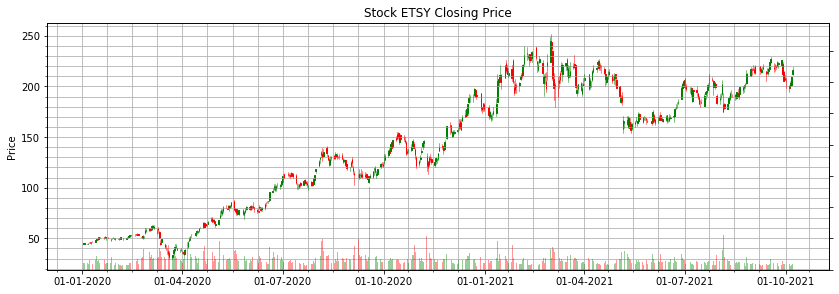

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
three_line_strike = talib.CDL3LINESTRIKE(df['Open'], df['High'], df['Low'], df['Close'])

three_line_strike = three_line_strike[three_line_strike != 0]

In [6]:
df['three_line_strike'] = talib.CDL3LINESTRIKE(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['three_line_strike'] !=0]

,Open,High,Low,Close,Adj Close,Volume,three_line_strike
Date,,,,,,,
2020-01-31,50.299999,50.349998,48.480000,48.810001,48.810001,2127900,100
2020-05-18,86.974998,88.019997,78.029999,78.180000,78.180000,6056700,100


In [8]:
df['Adj Close'].loc[df['three_line_strike'] !=0]

Date
2020-01-31    48.810001
2020-05-18    78.180000
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['three_line_strike'] !=0].index

DatetimeIndex(['2020-01-31', '2020-05-18'], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
three_line_strike

Date
2020-01-31    100
2020-05-18    100
dtype: int32

In [11]:
three_line_strike.index

DatetimeIndex(['2020-01-31', '2020-05-18'], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,three_line_strike
Date,,,,,,,
2020-01-02,44.709999,45.610001,44.709999,45.189999,45.189999,2152300,0
2020-01-03,44.500000,45.320000,44.020000,44.900002,44.900002,2109800,0
2020-01-06,44.669998,45.189999,44.360001,44.834999,44.834999,2077100,0
2020-01-07,45.000000,46.119999,44.900002,45.779999,45.779999,1945500,0
2020-01-08,45.840000,46.619999,44.875000,45.005001,45.005001,3222700,0
...,...,...,...,...,...,...,...
2021-10-01,206.770004,208.330002,198.509995,204.369995,204.369995,1995300,0
2021-10-04,200.270004,201.149994,194.369995,198.720001,198.720001,1882100,0
2021-10-05,200.059998,204.929993,198.800003,203.639999,203.639999,1286400,0


Text(0, 0.5, 'Price')

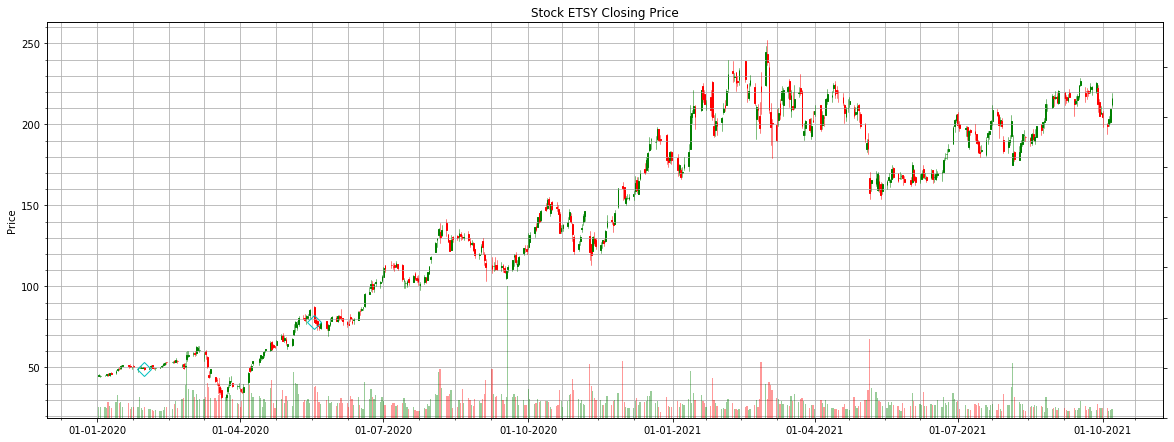

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['three_line_strike'] !=0].index, df['Adj Close'].loc[df['three_line_strike'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2020-05-01':'2020-06-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,three_line_strike,VolumePositive
0,737546.0,63.160000,64.599998,61.310001,64.445000,64.445000,3334400,0,True
1,737549.0,63.990002,68.180000,63.209999,67.690002,67.690002,2363900,0,True
2,737550.0,70.099998,76.500000,70.029999,72.790001,72.790001,9153400,0,True
3,737551.0,74.849998,78.629997,72.080002,78.239998,78.239998,6919500,0,True
4,737552.0,74.379997,78.839996,73.309998,76.589996,76.589996,6841500,0,True


Text(0, 0.5, 'Price')

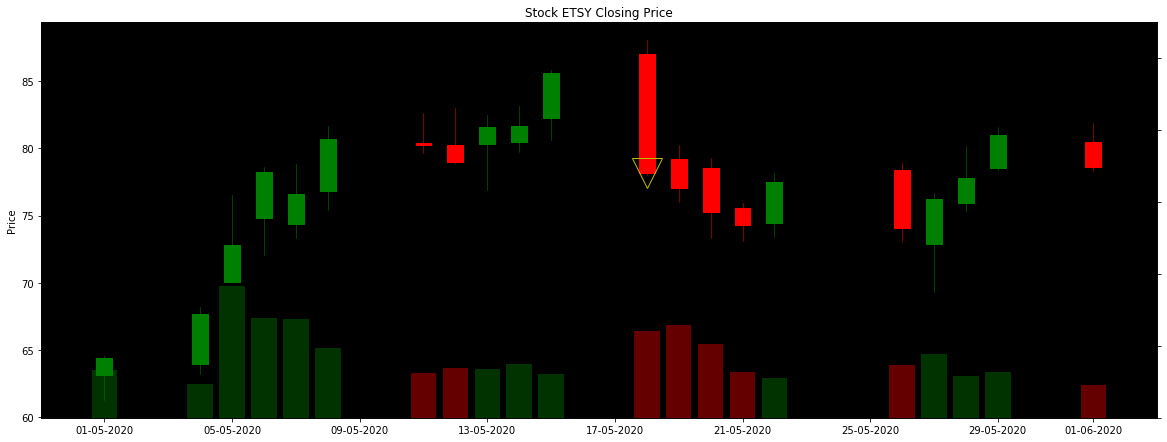

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('black')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['three_line_strike'] !=0].index, df['Adj Close'].loc[df['three_line_strike'] !=0],
                'vy', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=30.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

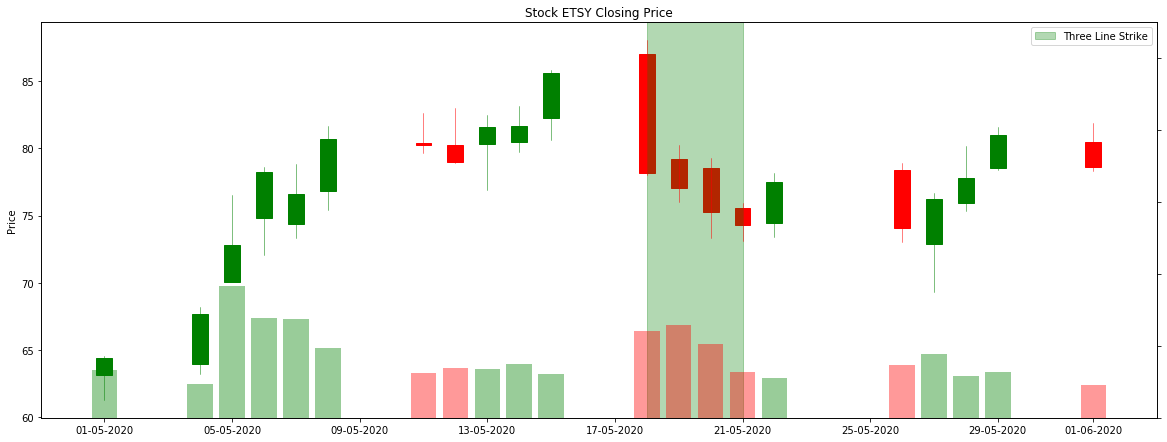

In [18]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2020,5,18)), date2num(datetime(2020,5,21)), 
           label="Three Line Strike",color="green", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')